In [23]:
from scipy import stats # dealing with probability distributions
import pandas as pd # for data manupulation and analysis
import matplotlib.pyplot as plt #for plotting
import numpy as np  # dealing with arrays
import dateutil # datetime module
import statistics # provides functions for calculating mathematical statistics

# Load data from csv file path
df= pd.read_csv('screening_exercise_orders_v201810.csv')

In [24]:
print(df.head())

   customer_id  gender                 date  value  predicted_gender
0         1000       0  2017-01-01 00:11:31  198.5                 1
1         1001       0  2017-01-01 00:29:56  338.0                 1
2         1002       1  2017-01-01 01:30:31  733.0                 1
3         1003       1  2017-01-01 01:34:22  772.0                 1
4         1004       0  2017-01-01 03:11:54  508.0                 1


In [25]:
# computing most_recent_order_date
customer_recentorder = df.groupby(['customer_id','gender'], sort=False)['date'].max()

In [26]:
# converting series to dataframe and resetting index
customer_recentorder_df = customer_recentorder.to_frame().reset_index()

In [27]:
# renaming column names
customer_recentorder_df.columns = ['customer_id','gender','most_recent_order_date']

In [28]:
# couting orders placed by the customer
order_count = df['customer_id'].value_counts()

In [29]:
# converting series to dataframe and resetting index
order_count_df = order_count.to_frame().reset_index()

In [30]:
# renaming column names
order_count_df.columns = ['customer_id','order_count']

In [31]:
# Problem statement
print("""
    Dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
    ------------------------------------------------------------""")

# solution

# Joining order_count dataframe with customer_recentorder dataframe 
customer_dataframe = customer_recentorder_df.set_index('customer_id').join(order_count_df.set_index('customer_id'))
print(customer_dataframe)


    Dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
    ------------------------------------------------------------
             gender most_recent_order_date  order_count
customer_id                                            
1000              0    2017-01-01 00:11:31            1
1001              0    2017-01-01 00:29:56            1
1002              1    2017-02-19 21:35:31            3
1003              1    2017-04-26 02:37:20            4
1004              0    2017-01-01 03:11:54            1
1005              1    2017-12-16 01:39:27            2
1006              1    2017-05-09 15:27:20            3
1007              0    2017-01-01 15:59:50            1
1008              0    2017-12-17 05:47:48            3
1009              1    2017-01-01 19:27:17            1
1010              1    2017-04-28 13:31:11            2
1011              

Populating the interactive namespace from numpy and matplotlib
Assumption: Week 1 begins on January 1, regardless of what day of the week that might be


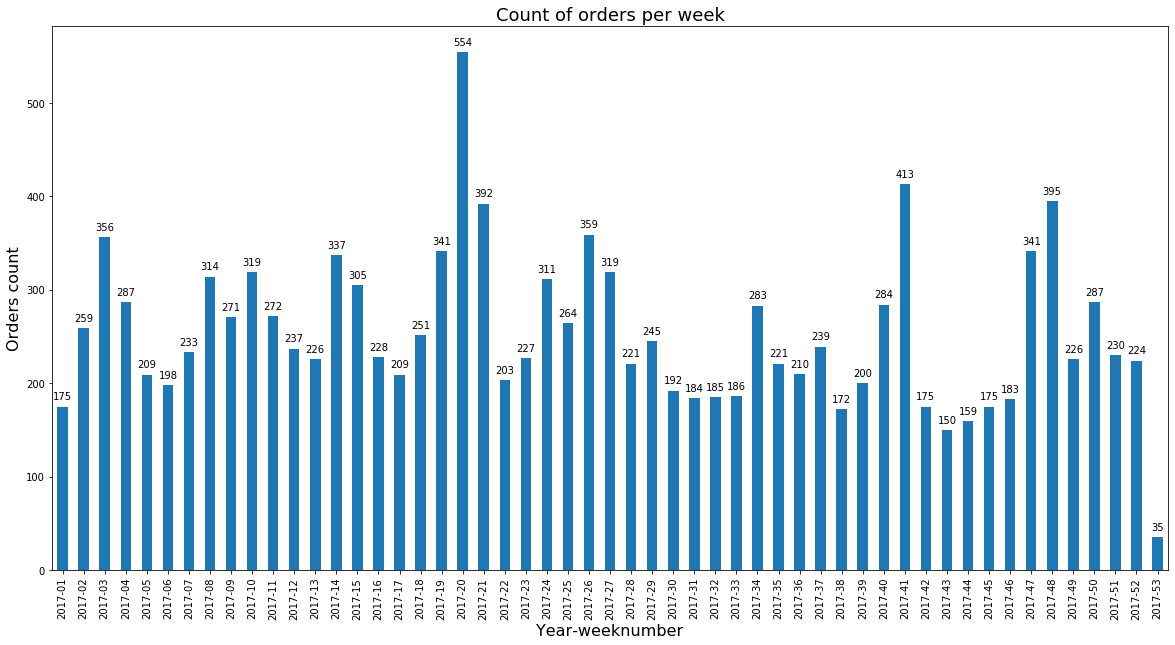

In [17]:
#resizing image size
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

print("Assumption: Week 1 begins on January 1, regardless of what day of the week that might be")

df['date'] = pd.to_datetime(df['date'])

# converting date to Year_week_number
df['Year_Week_Number'] = df.date.dt.strftime('%Y-%U')

# computing orders count per week
Orders_count_week = df.groupby(['Year_Week_Number'])['value'].count()

# renaming columns
Orders_count_week.columns = ['Year_Week_Number','Orders per Week']

# plotting bar graph
ax = Orders_count_week.plot.bar()

# annotate bars with values 
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Count of orders per week',fontsize=18)

plt.ylabel('Orders count',fontsize=16)
plt.xlabel('Year-weeknumber',fontsize=16)
plt.show()

In [35]:
print("""
Mean order value for gender 0 and for gender 1:
----------------------------------------------""")

# computing mean of gender0
gender0_mean = df.groupby('gender')['value'].mean()[0]

print(" -> mean order value of gender0 is " + str(round(gender0_mean,2)))
print("\n")

# computing mean of gender1
gender1_mean = df.groupby('gender')['value'].mean()[1]
print(" -> mean order value of gender1 is " + str(round(gender1_mean,2)))

print("""
Check whether difference between genders mean order value is significant:
-------------------------------------------------------------------------""")
# sample size
N = (df['customer_id'].count())/2

print("Performing a 2 sample t-test to test whether mean order value of gender 1 in the dataset is different from gender 0")
print("\n")
print("Null Hypothesis : Mean order values of gender 0 and gender 1 are the same")
print("\n")
print("Alternate Hypothesis : Mean order values of gender 0 and gender 1 are the different")
print("\n")

# computing variance of gender0
gender0_var = df.groupby('gender')['value'].var(ddof=1)[0]

# computing variance of gender1
gender1_var = df.groupby('gender')['value'].var(ddof=1)[1]

# computing standard deviation
s = np.sqrt((gender0_var + gender1_var)/2)

# computing t-statistics
t = (gender0_mean - gender1_mean)/(s*np.sqrt(2/N))
print(" -> t value is " + str(round(t,4)))
print("\n")

## Compare with the critical t-value
# Degrees of freedom
df = 2*N - 2

# p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

# multiply p value with 2 because its a two tail t-test
p_new = round(2*p,4)

print(" -> p value is " + str(p_new))
print("\n")

if ( p_new < 0.05 ):
    print("""we can infer from above that after comparing the t statistic with 
    the critical t value  we get a good p value of """ +  str(round(2*p,4))  + """ and 
    thus we reject the null hypothesis and thus it proves that the "mean order value of the two genders are different 
    and statistically significant" """)
else:
    print("""we can infer from above that after comparing the t statistic with 
    the critical t value  we get a good p value of """ +  str(round(2*p,4))  + """ and 
    thus we accept the null hypothesis and thus it proves that the "mean order value of the two genders are same" """)


Mean order value for gender 0 and for gender 1:
----------------------------------------------
 -> mean order value of gender0 is 363.89


 -> mean order value of gender1 is 350.71

Check whether difference between genders mean order value is significant:
-------------------------------------------------------------------------
Performing a 2 sample t-test to test whether mean order value of gender 1 in the dataset is different from gender 0


Null Hypothesis : Mean order values of gender 0 and gender 1 are the same


Alternate Hypothesis : Mean order values of gender 0 and gender 1 are the different


 -> t value is 1.976


 -> p value is 0.0482


we can infer from above that after comparing the t statistic with 
    the critical t value  we get a good p value of 0.0482 and 
    thus we reject the null hypothesis and thus it proves that the "mean order value of the two genders are different 
    and statistically significant" 
